In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dataset/train.csv')
# df = df[0:7000][:]
print(df.shape)
df.head()

(193573, 11)


id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [4]:
df.describe()

id          carat          depth          table  \
count  193573.000000  193573.000000  193573.000000  193573.000000   
mean    96786.000000       0.790688      61.820574      57.227675   
std     55879.856166       0.462688       1.081704       1.918844   
min         0.000000       0.200000      52.100000      49.000000   
25%     48393.000000       0.400000      61.300000      56.000000   
50%     96786.000000       0.700000      61.900000      57.000000   
75%    145179.000000       1.030000      62.400000      58.000000   
max    193572.000000       3.500000      71.600000      79.000000   

                   x              y              z          price  
count  193573.000000  193573.000000  193573.000000  193573.000000  
mean        5.715312       5.720094       3.534246    3969.155414  
std         1.109422       1.102333       0.688922    4034.374138  
min         0.000000       0.000000       0.000000     326.000000  
25%         4.700000       4.710000       2.900000     951.000000  
50%         5.700000       5.720000       3.530000    2401.000000  
75%         6.510000       6.510000       4.030000    5408.000000  
max         9.650000      10.010000      31.300000   18818.000000

In [5]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

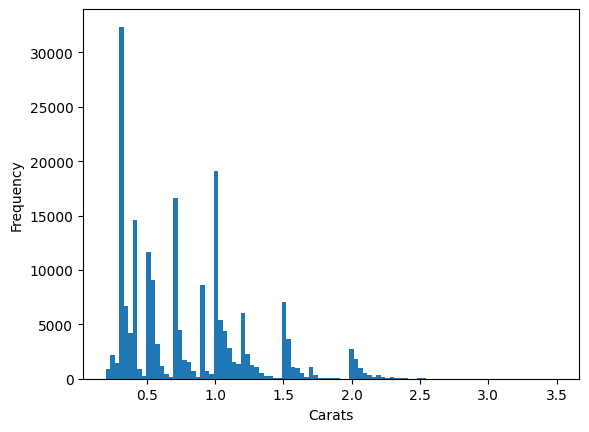

In [6]:
plt.hist(df['carat'],bins=100)
plt.xlabel('Carats')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [8]:
color_map = {
    'D': '#A9CCE3',
    'E': '#AED6F1',
    'F': '#85C1E9',
    'G': '#5DADE2',
    'H': '#3498DB',
    'I': '#2E86C1',
    'J': '#1F618D'
}


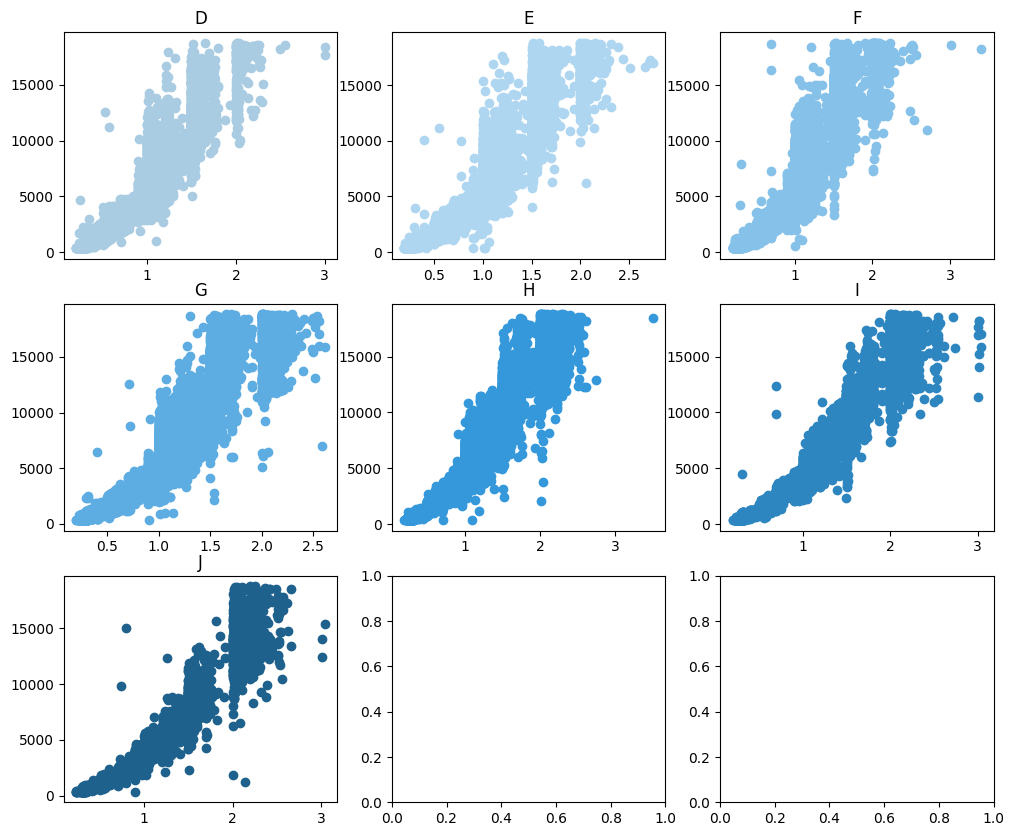

In [9]:
fig,axes = plt.subplots(3,3,figsize=(12,10))
x = 0
y = 0
for color in color_map:
    axes[y,x].scatter(df[df['color']==color]['carat'],df[df['color']==color]['price'],c=color_map[color])
    axes[y,x].set_title(color)
    x += 1
    if x==3:
        y += 1
        x = 0
plt.show()

Color is thus not such an important factor for the Price, it is linearly dependent with Carats

In [10]:
df["Volume"] = df["x"]*df["y"]*df["z"]
df.head()

id  carat        cut color clarity  depth  table     x     y     z  price  \
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619   
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387   
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772   
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666   
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453   

       Volume  
0  242.465405  
1  330.508360  
2  114.112950  
3   52.345818  
4  277.692705

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
 11  Volume   193573 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 17.7+ MB


<Axes: >

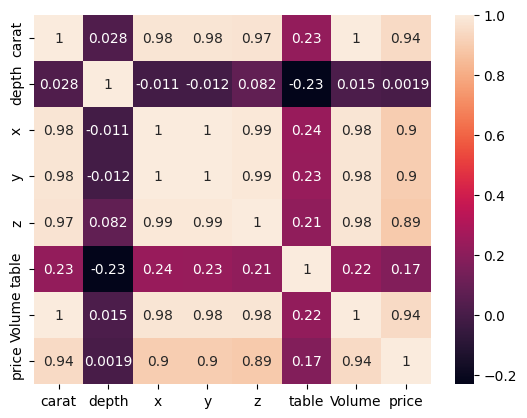

In [12]:
import seaborn as sns
L = ['carat','depth','x','y','z','table','Volume','price']
df_subset = df[L]
corr = df_subset.corr(method='pearson')
sns.heatmap(corr,annot=True)

In [13]:
df.drop(['depth'],axis=1,inplace=True)

In [14]:
df.head()

id  carat        cut color clarity  table     x     y     z  price  \
0   0   1.52    Premium     F     VS2   58.0  7.27  7.33  4.55  13619   
1   1   2.03  Very Good     J     SI2   58.0  8.06  8.12  5.05  13387   
2   2   0.70      Ideal     G     VS1   57.0  5.69  5.73  3.50   2772   
3   3   0.32      Ideal     G     VS1   56.0  4.38  4.41  2.71    666   
4   4   1.70    Premium     G     VS2   59.0  7.65  7.61  4.77  14453   

       Volume  
0  242.465405  
1  330.508360  
2  114.112950  
3   52.345818  
4  277.692705

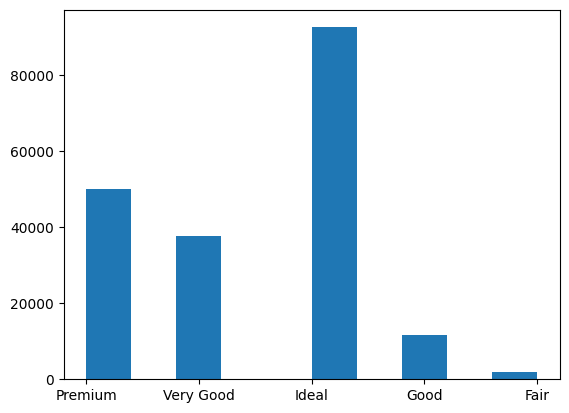

In [15]:
plt.hist(df['cut'])
plt.show()

In [16]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [18]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price', 'Volume'],
      dtype='object')

In [19]:
L2 = df.columns
L2 = list(L2)
L2.remove('price')
X = df[L2]
Y = df['price']

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler

clarity_categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
cut_order = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

pipeline = Pipeline([
    ('s1',SimpleImputer(strategy='most_frequent')),
    ('s2',OrdinalEncoder(categories=clarity_categories)),
    ('s3',MaxAbsScaler())
])

pipeline2 = Pipeline([
    ('s1',SimpleImputer(strategy='most_frequent')),
    ('s2',OrdinalEncoder(categories=cut_order)),
    ('s3',MaxAbsScaler())
])

pipeline3 = Pipeline([
    ('s1',SimpleImputer(strategy='mean')),
    ('s3',MaxAbsScaler())
])

ct = ColumnTransformer(
    transformers=[
        ('clar',pipeline,['clarity']),
        ('cut',pipeline2,['cut']),
        ('others',pipeline3,['carat','table','x','y','z','Volume'])
    ]
)

ct.fit(X_train)
ct.set_output(transform="pandas")
# Index(['id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
#        'price', 'Volume'],
#       dtype='object')

ColumnTransformer(transformers=[('clar',
                                 Pipeline(steps=[('s1',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('s2',
                                                  OrdinalEncoder(categories=[['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']])),
                                                 ('s3', MaxAbsScaler())]),
                                 ['clarity']),
                                ('cut',
                                 Pipeline(steps=[('s1',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('s2',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal']])),
                                                 ('s3', MaxAbsScaler())]),
                                 ['cut']),
                                ('others',
                                 Pipeline(steps=[('s1', SimpleImputer()),
                                                 ('s3', MaxAbsScaler())]),
                                 ['carat', 'table', 'x', 'y', 'z', 'Volume'])])

In [22]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MaxAbsScaler was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MaxAbsScaler was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MaxAbsScaler was fi

In [23]:
X_train.head()

clar__clarity  cut__cut  others__carat  others__table  others__x  \
83475        0.285714      0.75       0.091429       0.828571   0.453886   
160324       0.428571      0.75       0.342857       0.814286   0.705699   
101740       0.428571      1.00       0.428571       0.785714   0.756477   
180341       0.142857      0.75       0.477143       0.842857   0.792746   
48480        0.428571      0.25       0.285714       0.857143   0.656995   

        others__y  others__z  others__Volume  
83475    0.440559   0.086581        0.062693  
160324   0.675325   0.135783        0.234324  
101740   0.725275   0.144728        0.287536  
180341   0.760240   0.150479        0.328399  
48480    0.629371   0.128435        0.192305

In [24]:
import joblib
joblib.dump(ct,'column_transformer.pkl')

['column_transformer.pkl']

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,LinearRegression,SGDRegressor

In [26]:
params = {
    'alpha':[0,0.1,0.2,0.3,1],
    'fit_intercept':[True,False],
    'tol':[1e-0,1e-1,1e-2,1e-3]
}
gc = GridSearchCV(Ridge(),param_grid=params,cv=4,scoring='neg_mean_squared_error')

In [27]:
gc.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 1],
                         'fit_intercept': [True, False],
                         'tol': [1.0, 0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [28]:
gc.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'tol': 1.0}

In [29]:
model = gc.best_estimator_
joblib.dump(model,'ridge_best.pkl')

['ridge_best.pkl']

In [30]:
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(np.array(Y_test),model.predict(X_test)))

1083.6892856030056


In [31]:
print(Y_test)

14868      1355
165613    14691
96727       844
145593      707
118689     5797
          ...  
168548     3864
167333      734
113317     3950
25575      1197
116310     1168
Name: price, Length: 38715, dtype: int64


In [32]:
print(pd.Series(model.predict(X_test)))

0         1016.498701
1        14696.440756
2         1223.451802
3         1405.642450
4         6922.169662
             ...     
38710     4840.089460
38711      381.566193
38712     3871.636029
38713      831.091682
38714     1308.184112
Length: 38715, dtype: float64


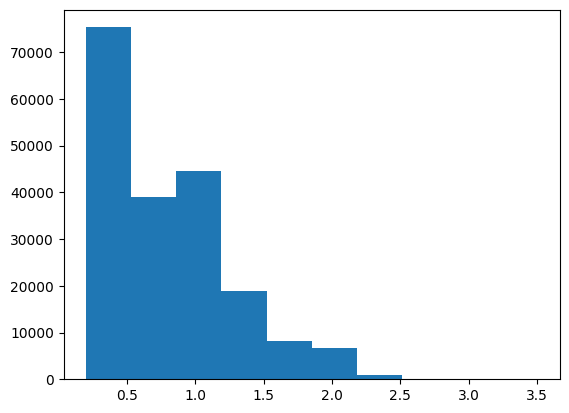

In [36]:
plt.hist(df["carat"])
plt.show()

In [57]:
L = []
L1 = []
L2 = []
for volume in range(175,275,1):
    for carat in range(1,50):
        df = {'carat':[carat/20],'table':[np.nan],'x':[np.nan],'y':[np.nan],'z':[np.nan],'Volume':[volume],'cut':[np.nan],'clarity':[np.nan]}
        df = pd.DataFrame(df)
        df = ct.transform(df)
        price = model.predict(df)[0]
        L.append((volume))
        L1.append(carat)
        L2.append(price)

c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MaxAbsScaler was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MaxAbsScaler was fitted without feature names
  warnings.warn(
c:\Users\om409\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MaxAbsScaler was fi

In [60]:
L1 = list(map(lambda x:x/20,L1))

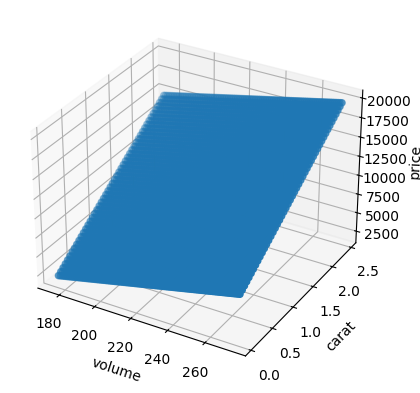

In [61]:
ax = plt.axes(projection='3d')
ax.scatter(L,L1,L2)
ax.set_xlabel('volume')
ax.set_ylabel('carat')
ax.set_zlabel('price')
plt.show()